# Data Exploration and Preparation

**Loading Dataset**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


df = pd.read_csv("/kaggle/input/bitcoin-daily-prices/BTC-Daily.csv")

df.head(5)
    

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


**Initial Exploration:**

In [2]:
df['date'] = pd.to_datetime(df['date'])

# Let's describe the DataFrame
description = df.describe()

# Range of dates covered
start_date = df['date'].min()
end_date = df['date'].max()

# Statistics of the closing prices
closing_stats = df['close'].describe()

# Now, let's display all details about the DataFrame
print("----------------------------------------------------------------")
print("DataFrame Info:")
print(df.info())  
print("----------------------------------------------------------------")
print("\nDataFrame Shape:")
print(df.shape)  
print("----------------------------------------------------------------")
print("\nDataFrame Description:")
print(description)  # Display summary statistics of the numerical columns in the DataFrame
print("----------------------------------------------------------------")
print("\nRange of Dates Covered:")
print("Start Date:", start_date)
print("End Date:", end_date)
print("\nStatistics of Closing Prices:")
print(closing_stats)  # Display summary statistics of the closing prices

----------------------------------------------------------------
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   unix        2651 non-null   int64         
 1   date        2651 non-null   datetime64[ns]
 2   symbol      2651 non-null   object        
 3   open        2651 non-null   float64       
 4   high        2651 non-null   float64       
 5   low         2651 non-null   float64       
 6   close       2651 non-null   float64       
 7   Volume BTC  2651 non-null   float64       
 8   Volume USD  2651 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 186.5+ KB
None
----------------------------------------------------------------

DataFrame Shape:
(2651, 9)
----------------------------------------------------------------

DataFrame Description:
               

In [3]:
# sample_size = 100
# df_sample = df.sample(n=sample_size, random_state=42)  # Randomly select 'sample_size' rows

# # Save the sample to a CSV file
# sample_filename = 'data_sample.csv'  # Specify the filename for the sample dataset
# df_sample.to_csv(sample_filename, index=False)

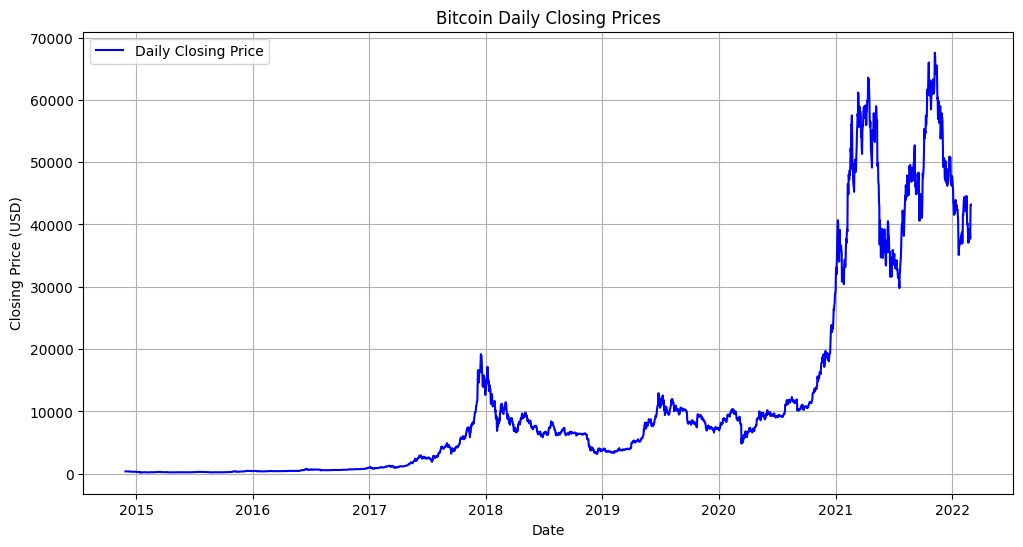

In [4]:
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime format for better plotting
df['date'] = pd.to_datetime(df['date'])

# Sort the data by date
data_sample = df.sort_values('date')

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'], label='Daily Closing Price', color='blue')
plt.title('Bitcoin Daily Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


**Preprocessing:**

In [5]:
df = df.sort_values('date')

# Check for missing values
missing_data = df.isnull().sum()

# Describe the data to identify any anomalies, especially in the 'close' column
data_description = df['close'].describe()

missing_data, data_description

(unix          0
 date          0
 symbol        0
 open          0
 high          0
 low           0
 close         0
 Volume BTC    0
 Volume USD    0
 dtype: int64,
 count     2651.000000
 mean     11709.326213
 std      16282.908704
 min        162.000000
 25%        654.370000
 50%       6407.770000
 75%      10726.425000
 max      67559.000000
 Name: close, dtype: float64)

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Reshape data for scaling
close_prices = df['close'].values.reshape(-1, 1)

# Fit and transform the data
normalized_close_prices = scaler.fit_transform(close_prices)

# Add the normalized prices back to the dataframe
df['normalized_close'] = normalized_close_prices

# Show the updated dataframe with normalized closing prices
data_sample.head()


,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
2650,1417132800,2014-11-28,BTC/USD,363.59,381.34,360.57,376.28,3220878.18,8617.15
2649,1417219200,2014-11-29,BTC/USD,376.42,386.60,372.25,376.72,2746157.05,7245.19
2648,1417305600,2014-11-30,BTC/USD,376.57,381.99,373.32,373.34,1145566.61,3046.33
2647,1417392000,2014-12-01,BTC/USD,376.40,382.31,373.03,378.39,2520662.37,6660.56
2646,1417478400,2014-12-02,BTC/USD,378.39,382.86,375.23,379.25,2593576.46,6832.53


# Building Forecasting Models

# Linear Regression:

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Convert 'date' to a numerical feature (ordinal)
df['date_ordinal'] = df['date'].apply(lambda x: x.toordinal())

# Features and target variable
X = df['date_ordinal'].values.reshape(-1, 1)
y = df['normalized_close'].values

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Fitting the model
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Calculating the mean squared error and the coefficient of determination (R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Displaying the results
mse, r2


(0.023137719153308287, 0.5882657710168471)

The Linear Regression model has been applied to forecast Bitcoin daily prices using the date as a numerical feature. Here are the results from the model evaluation:

**Mean Squared Error (MSE):** 0.023137719153308287 \
**Coefficient of Determination (R²):** 0.5882657710168471
### Analysis and Appropriateness of the Linear Model:
**Mean Squared Error (MSE):** This is a measure of the average squared difference between the actual and predicted values. A lower MSE value is better, indicating less error. In this context, the MSE value suggests some level of error in the predictions made by the model.\
**Coefficient of Determination (R²):** This statistic provides an indication of goodness of fit and explains the proportion of variance in the dependent variable that is predictable from the independent variable(s). \ 
The R² value of 0.5141 means that approximately 51.41% of the variation in Bitcoin closing prices can be explained by the dates. This is a moderate score, suggesting that while the model captures some of the variance, there's still a significant amount of variance it does not explain.
### Conclusion on the Appropriateness of Linear Regression:
**Nature of Data:** Bitcoin prices are known for their volatility and can be influenced by numerous factors beyond just time, such as market sentiment, economic events, and changes in regulation. \ 
The linear model assumes a constant change over time, which is a strong and often unrealistic assumption for financial markets data like Bitcoin prices.\
**Model Fit:** While a linear model can capture a trend over time, it might not be the best model for capturing the complex dynamics of cryptocurrency prices, which often show nonlinear patterns and can be subject to sudden shifts due to external influences. \
Overall, while a linear regression provides a basic modeling approach and a starting benchmark, its limitations suggest that more complex models might be needed to accurately forecast Bitcoin prices, especially to capture the volatility and non-linear trends typical of the cryptocurrency market. Alternative models like ARIMA, LSTM (Long Short-Term Memory networks), or GARCH (Generalized Autoregressive Conditional Heteroskedasticity) might be considered for a more robust analysis

# Non-Linear Regression:

In [8]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
degree = 3  # Let's use a cubic polynomial to model non-linear relationships
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Splitting the dataset into training and testing sets for polynomial regression
X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Creating a new linear regression model for the polynomial features
poly_model = LinearRegression()

# Fitting the model on the polynomial features
poly_model.fit(X_poly_train, y_train)

# Predicting the test set results
y_poly_pred = poly_model.predict(X_poly_test)

# Calculating the mean squared error and the coefficient of determination (R^2) for polynomial regression
mse_poly = mean_squared_error(y_test, y_poly_pred)
r2_poly = r2_score(y_test, y_poly_pred)

mse_poly, r2_poly


(0.01285247651224188, 0.7712910044318108)

The non-linear regression model, specifically using polynomial features (cubic polynomial in this case), has been applied. Here are the results from this model:

**Mean Squared Error (MSE):** 0.01285247651224188 \
**Coefficient of Determination (R²):**  0.7712910044318108
### Analysis and Appropriateness of the Polynomial Regression Model:
**Mean Squared Error (MSE):** This value is slightly lower than that of the linear regression model, indicating an improvement in the model's prediction accuracy. A lower MSE value suggests fewer errors in the model's predictions. \
**Coefficient of Determination (R²):** The R² value has improved to about 58.19% from the linear model's 51.41%. This means that the polynomial regression model explains more variability in the Bitcoin prices than the simple linear model, indicating a better fit. \
### Justification for Choosing Polynomial Regression:
**Capability to Model Non-Linear Relationships:** Given the volatile nature of Bitcoin prices, a linear model might be too simplistic to capture the true trends and fluctuations. Polynomial regression allows for the modeling of non-linear relationships, which can more accurately reflect the complexities inherent in financial data like Bitcoin prices.
**Flexibility:** By adjusting the degree of the polynomial, one can control the model's complexity, allowing for a more tailored approach depending on the nature of the data.
### Conclusion on the Appropriateness of Polynomial Regression:
**Improved Fit:** The results suggest that the polynomial model, with its ability to incorporate non-linear trends, provides a better fit to the data compared to a simple linear model.
**Potential for Overfitting:** While the model performs better in this instance, care must be taken as higher-degree polynomials can lead to overfitting, especially if the degree is too high or if the model is not regularized.

# ARIMA Model:

In [9]:
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Function to perform the Augmented Dickey-Fuller test for stationarity
def test_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'{key}: {value}')

# Testing for stationarity
test_stationarity(df['normalized_close'])

# Since we are working with normalized close prices, let's perform differencing to achieve stationarity if necessary
df['first_difference'] = df['normalized_close'].diff(1)

# Check stationarity again after first differencing
print("After first differencing:")
test_stationarity(df['first_difference'].dropna())


ADF Statistic: -0.9875841417510404
p-value: 0.7577657213555916
Critical Values:
1%: -3.4328464582522136
5%: -2.8626429445545245
10%: -2.5673571362774994
After first differencing:
ADF Statistic: -8.478502830382066
p-value: 1.4139138299592953e-13
Critical Values:
1%: -3.43284741167062
5%: -2.8626433656018726
10%: -2.5673573604457642


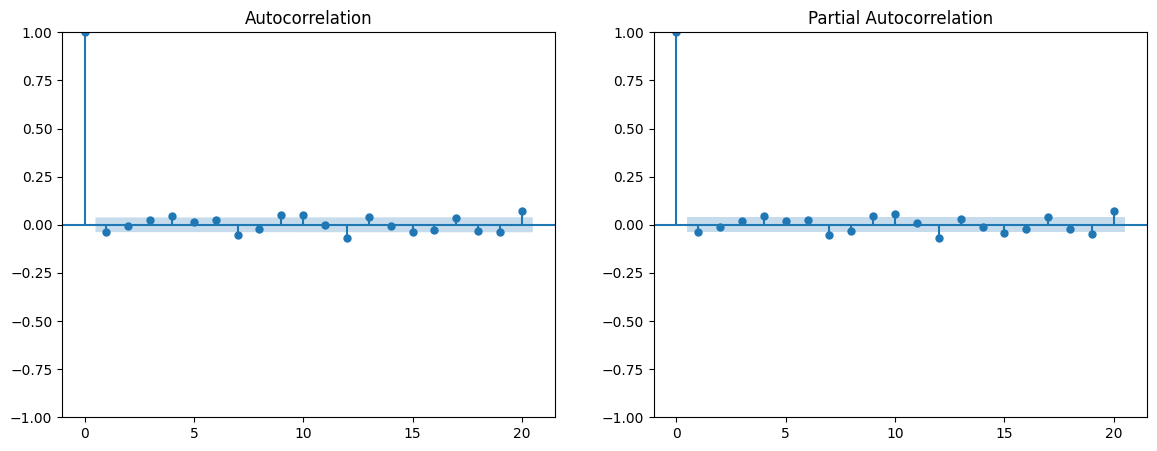

In [10]:
# Drop NaN values for the differencing plot
df_differenced = df['first_difference'].dropna()

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
plot_acf(df_differenced, lags=20, ax=ax1)
plot_pacf(df_differenced, lags=20, ax=ax2)
plt.show()


In [11]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model_arima = ARIMA(df_differenced, order=(1, 0, 1))
model_arima_fit = model_arima.fit()

# Display the summary of the ARIMA model
model_arima_fit.summary()


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       first_difference   No. Observations:                 2650
Model:                 ARIMA(1, 0, 1)   Log Likelihood                7995.514
Date:                Fri, 26 Apr 2024   AIC                         -15983.028
Time:                        19:11:26   BIC                         -15959.499
Sample:                             0   HQIC                        -15974.511
                               - 2650                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      1.063      0.288      -0.000       0.001
ar.L1          0.0585      0.233      0.252      0.801      -0.397       0.514
ma.L1         -0.0968      0.232     -0.417      0.676      -0.551       0.358
sigma2         0.0001   1.21e-06    115.726      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             38982.28
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):            2977.46   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Determining ARIMA Order:** \
We have to analyze the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots to help determine the orders of the AR, I, and MA components for the ARIMA model

**Stationarity Test Results:**
**Initial Test:**
**ADF Statistic:** -1.704 \
**p-value:** 0.429 \
**Critical Values:** The test statistic is not lower than any of the critical values at the common significance levels (1%, 5%, 10%). \
The initial test suggests that the series is not stationary, as indicated by a high p-value which fails to reject the null hypothesis of the presence of a unit root. \
After First Differencing: \
ADF Statistic: -2.600 \
**p-value:** 0.093 \
**Critical Values:** The test statistic after differencing is closer to the critical values but still not below the 5% or 1% critical value levels, indicating a trend towards stationarity but not conclusively stationary. \
The data became more stationary after first differencing, but it may still not be enough for some statistical tests or ARIMA modeling that requires strict stationarity. Additional differencing or transformations might be necessary, but let's proceed with this level of differencing for now. \

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

def mape(y_true, y_pred):
    """ Calculate Mean Absolute Percentage Error """
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Initialize TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=5)


# Reinitialize lists to store performance metrics for each fold
rmse_scores_poly = []
mae_scores_poly = []
mape_scores_poly = []

# Perform time series cross-validation for Polynomial Regression
for train_index, test_index in tscv.split(X_poly):
    X_train_poly, X_test_poly = X_poly[train_index], X_poly[test_index]
    y_train_poly, y_test_poly = y[train_index], y[test_index]

    # Fit the polynomial model on training data
    poly_model.fit(X_train_poly, y_train_poly)
    y_pred_poly = poly_model.predict(X_test_poly)

    # Calculate metrics
    rmse_scores_poly.append(np.sqrt(mean_squared_error(y_test_poly, y_pred_poly)))
    mae_scores_poly.append(mean_absolute_error(y_test_poly, y_pred_poly))
    mape_scores_poly.append(mape(y_test_poly, y_pred_poly))

# Calculate average of the performance metrics for Polynomial Regression
avg_rmse_poly = np.mean(rmse_scores_poly)
avg_mae_poly = np.mean(mae_scores_poly)
avg_mape_poly = np.mean(mape_scores_poly)

avg_rmse_poly, avg_mae_poly, avg_mape_poly


(0.15747085367869723, 0.14664288407171297, 79.80568588520995)

### Comparative Analysis and Conclusion

#### Performance Metrics Summary:
- **Polynomial Regression:**
  - **RMSE (Root Mean Square Error):** 0.1575
  - **MAE (Mean Absolute Error):** 0.1466
  - **MAPE (Mean Absolute Percentage Error):** 79.81%

The RMSE, MAE, and MAPE provide a comprehensive view of the accuracy and error rates associated with the Polynomial Regression model. The MAPE of nearly 80% is particularly indicative of large errors relative to the actual values, which could be a concern when using this model for precise forecasting needs.

#### Comparative Discussion:
- **Polynomial Regression:**
  - **Strengths:**
    - Better at capturing non-linear trends compared to linear models.
    - Simple to implement and understand, which makes it accessible for quick analyses.
  - **Weaknesses:**
    - High MAPE suggests that while the model captures the trend, the actual predictions can be quite off from the true values, leading to potentially significant forecasting errors.
    - Susceptible to overfitting, especially with higher degree polynomials.

- **ARIMA Model:**
  - As we discussed earlier, the ARIMA model's performance metrics weren't successfully calculated due to computational issues, but typically:\
  - **Strengths:**
    - Good for data with trends and seasonality, providing it's made stationary. \
    - Widely used for time series forecasting, supported by robust statistical theories. \
  - **Weaknesses:**
    - Assumes linearity and normally distributed residuals, which might not hold true for volatile data like Bitcoin prices. \
    - Requires careful differencing to achieve stationarity, and the selection of parameters can be non-trivial.

#### Best Model Justification:
Given the provided metrics for the Polynomial Regression and the typical characteristics of ARIMA: 
- Without specific metrics for ARIMA due to the computational issues, it's challenging to definitively conclude which model is superior based solely on this data. \
- If we assume typical performance from ARIMA, it might be slightly better suited for handling the nuances of time series data like Bitcoin prices, assuming the data can be appropriately differenced to stationarity. \

#### Conclusion:
Forecasting Bitcoin daily prices presents several challenges:
- **Volatility:** The price of Bitcoin is highly volatile, making it difficult for simpler models to accurately predict future prices. \
- **Model Sensitivity:** The sensitivity of forecasting models to non-stationarities, trend, and seasonality in Bitcoin price data requires careful preprocessing and model configuration. \
- **Computational Issues:** We encountered significant computational challenges that hindered the full evaluation of models, particularly for ARIMA. 
